# Assignment 2:

In [12]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, acovf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)

## Question 2.1

A process $X_t$ is given as:
$$
X_t = \varepsilon_t + \varepsilon_{t-1} + \varepsilon_{t-2} + \varepsilon_{t-3}
$$

This is a MA(3) process.

Text(0.5, 0, 't')

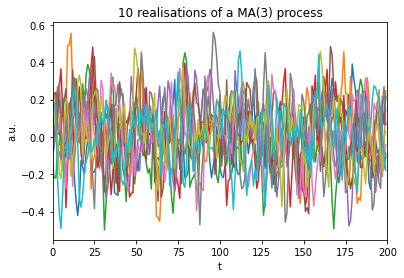

In [13]:
# Parameters:
order = 3
numRealisations = 10
numObservations = 200
sigma = 0.1

# Make process:
MAProcess = ArmaProcess(ar= [1], ma= np.ones(order))
realisations = []
for r in range(numRealisations):
    simulation = MAProcess.generate_sample(nsample= numObservations, scale= sigma)
    realisations.append(simulation)
    plt.plot(simulation)

plt.xlim(0, numObservations)
plt.title(f"{numRealisations} realisations of a MA({order}) process")
plt.ylabel("a.u.")
plt.xlabel("t")


### Second order moment representation:

Expectation value: -0.011117423613017874
Variance: 0.023318475003511075
Sigma: 0.1527038801193705
autocovariance:
 200


/Users/emilhaugstvedt/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:436: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


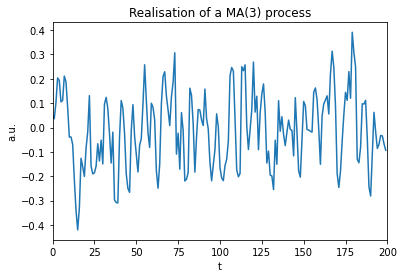

In [14]:
# Plot simulation 0:
plt.figure
plt.plot(realisations[0])
plt.xlim(0, numObservations)
plt.title(f"Realisation of a MA({order}) process")
plt.ylabel("a.u.")
plt.xlabel("t")

mean = np.mean(realisations[0])
print(f"Expectation value: {mean}")

var = np.nanvar(realisations[0])
print(f"Variance: {var}")
print(f"Sigma: {np.sqrt(var)}")

autoCov = acovf(realisations[0])
print(f"autocovariance:\n {len(autoCov)}")



Mean1: -0.06127724753452802
Mean2: -0.00010254128171262978
Mean3: -0.014946213445209062
Mean4: 0.031856307809378225 

Var1: 0.02553603011984994
Var2: 0.018930083047900892
Var3: 0.021982655071206458
Var4: 0.022326394982534276


(array([ 2.,  6., 27., 25., 41., 31., 41., 12., 13.,  2.]),
 array([-0.42004856, -0.33895324, -0.25785792, -0.1767626 , -0.09566728,
        -0.01457196,  0.06652336,  0.14761868,  0.228714  ,  0.30980932,
         0.39090464]),
 <BarContainer object of 10 artists>)

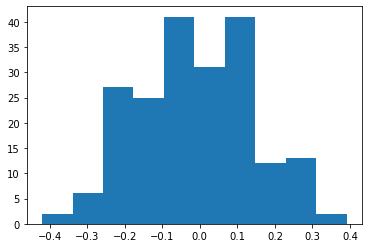

In [15]:
# Split data into several parts and check mean and variance:
split = round(len(realisations[0]) / 4)

mean1, mean2, mean3, mean4 = np.mean(realisations[0][:split]), np.mean(realisations[0][split: 2*split]), np.mean(realisations[0][2*split:3*split]), np.mean(realisations[0][3*split:])
print(f"Mean1: {mean1}")
print(f"Mean2: {mean2}")
print(f"Mean3: {mean3}")
print(f"Mean4: {mean4} \n")

var1, var2, var3, var4 = np.nanvar(realisations[0][:split]), np.nanvar(realisations[0][split: 2*split]), np.nanvar(realisations[0][2*split:3*split]), np.nanvar(realisations[0][3*split:])
print(f"Var1: {var1}")
print(f"Var2: {var2}")
print(f"Var3: {var3}")
print(f"Var4: {var4}")


# Plot histogram of data:
plt.hist(realisations[0])

In [16]:
roots = np.roots(np.poly1d(np.ones(order)))
print(f"The roots are: {round(roots[0], 2)}, {round(roots[1], 2)}, {round(roots[2], 2)}")
print(f"Absolute value of root 1: {round(abs(roots[0]),2)}")
print(f"Absolute value of root 2: {round(abs(roots[1]), 2)}")
print(f"Absolute value of root 3: {round(abs(roots[2]), 2)}")


<ipython-input-16-2a0e18b8f9ba>:2: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  print(f"The roots are: {round(roots[0], 2)}, {round(roots[1], 2)}, {round(roots[2], 2)}")


IndexError: index 2 is out of bounds for axis 0 with size 2

/Users/emilhaugstvedt/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Users/emilhaugstvedt/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/Users/emilhaugstvedt/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Users/emilhaugstvedt/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True

Text(0, 0.5, 'ACF')

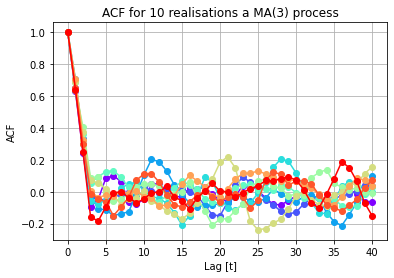

In [17]:
# Plot ACF of all different realisations in different colors:
from matplotlib.pyplot import cm

color = cm.rainbow(np.linspace(0, 1, 10))

fig = plt.figure()
for r, c in zip(realisations, color):
    autoCorr, qStat,_ = acf(r, qstat= True)
    plt.plot(autoCorr, "-o", c= c)
plt.grid()

plt.title(f"ACF for 10 realisations a MA({order}) process")
plt.xlabel("Lag [t]")
plt.ylabel("ACF")



/Users/emilhaugstvedt/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1016: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Users/emilhaugstvedt/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/Users/emilhaugstvedt/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1016: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Users/emilhaugstvedt/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq

<Figure size 432x288 with 0 Axes>

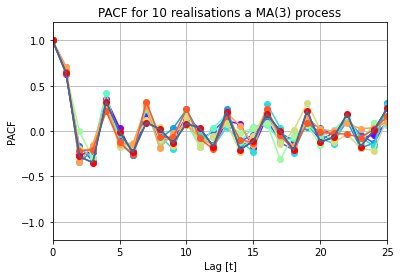

In [18]:

fig = plt.figure()
for r in realisations:
    partialAutoCorr = color = cm.rainbow(np.linspace(0, 1, 10))

fig = plt.figure()
for r, c in zip(realisations, color):
    partialAutoCorr = pacf(r)
    plt.plot(partialAutoCorr, "-o", c= c)
plt.grid()

plt.title(f"PACF for 10 realisations a MA({order}) process")
plt.xlabel("Lag [t]")
plt.ylabel("PACF")
plt.xlim((0, 25))
plt.ylim((-1.2, 1.2))
plt.plot(partialAutoCorr)

In [19]:
for r in range(len(realisations)):
    print(f"The variance for realisation {r + 1} is {round(np.nanvar(realisations[r]), 4)} \
        and mean: {round(np.mean(realisations[r]), 4)}")

The variance for realisation 1 is 0.0233         and mean: -0.0111
The variance for realisation 2 is 0.0274         and mean: 0.0246
The variance for realisation 3 is 0.0316         and mean: -0.0259
The variance for realisation 4 is 0.0294         and mean: 0.0026
The variance for realisation 5 is 0.0281         and mean: 0.0382
The variance for realisation 6 is 0.0289         and mean: 0.0386
The variance for realisation 7 is 0.0275         and mean: 0.0017
The variance for realisation 8 is 0.0351         and mean: 0.0255
The variance for realisation 9 is 0.0243         and mean: 0.0336
The variance for realisation 10 is 0.0277         and mean: 0.0064


## Question 2.2:

Model for house temperature:

$$
(1-0.5B + 0.3B^2)(1-0.9B^{12})(Y_t - \mu) = \varepsilon_t
$$

Where $\varepsilon_t$ are a white noise porces with variance $\sigma^2_{\varepsilon} = 0.5^2$ and $\mu = 55$.

In [20]:
# Put the data into a data frame:
temp = np.array([46.6, 49.5, 60.3, 59.2, 59.5, 61.9, 59.7, 60.1, 57.8, 49.7, 49.7, 50.1, 48.6, 54.5, 62.3])
year = np.array([2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017])
month = np.array([9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

data = pd.DataFrame()
data["Year"] = year
data["Month"] = month
data["Temp"] = temp

print(data)


    Year  Month  Temp
0   2016      9  46.6
1   2016     10  49.5
2   2016     11  60.3
3   2016     12  59.2
4   2017      1  59.5
5   2017      2  61.9
6   2017      3  59.7
7   2017      4  60.1
8   2017      5  57.8
9   2017      6  49.7
10  2017      7  49.7
11  2017      8  50.1
12  2017      9  48.6
13  2017     10  54.5
14  2017     11  62.3


The forecasts are:
58.71
58.26
Confidence +-
0.98
1.0957


Text(0, 0.5, 'Temperature [°F]')

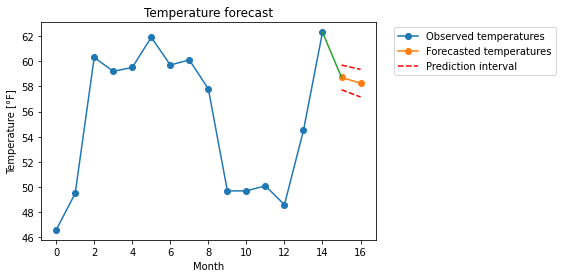

In [28]:
# Parameters:
numStepsForecast = 2

mu = 55
sigma = 0.5
p = 2  # Due to two B's
d = 0
q = 0


# Seasonal parameters:
P = 1 # Due to one B at 12
D = 0
Q = 0
s = 12

# Make model:
model = ARIMA(np.array(data["Temp"]), order= (p, d, q), seasonal_order=(P, D, Q, s))

# Fit model using the provided parameters:
with model.fix_params({"const": mu, "sigma2": sigma**2,"ar.L1": 0.5, "ar.L2": -0.3, "ar.S.L12": 0.9}):
    res = model.fit()

#print(res.summary())

# Forecast:
forecast = res.get_forecast(numStepsForecast)
yhat = forecast.predicted_mean
confInt = np.transpose(forecast.conf_int())
print(f"The forecasts are:")
print(round(yhat[0], 2))
print(round(yhat[1], 2))
print("Confidence +-")
print(round(yhat[0] - confInt[0][0], 4))
print(round(yhat[1] - confInt[0][1], 4))


# Time vectors for plotting:
timeVectorData = [t for t in range(len(data))]
timeVectorForecast = [t for t in range(len(data), len(data) + len(yhat))]

# Plot
plt.plot(timeVectorData, data["Temp"], "-o")
plt.plot(timeVectorForecast, yhat, "-o")
plt.plot(timeVectorForecast, confInt[0], "--r")
plt.plot(timeVectorForecast, confInt[1], "--r")
plt.plot([14,15], [data["Temp"][len(data)-1], yhat[0]]) # Connecting the two graphs for visuals.
plt.title("Temperature forecast")
plt.legend(["Observed temperatures", "Forecasted temperatures", "Prediction interval"], bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel("Month")
plt.ylabel("Temperature [°F]")



## Question 2.3: See other file

### 1.) A(1, 0, 0)x(0, 0, 0)$_{12}$ model with $\phi_1 = -0.85$

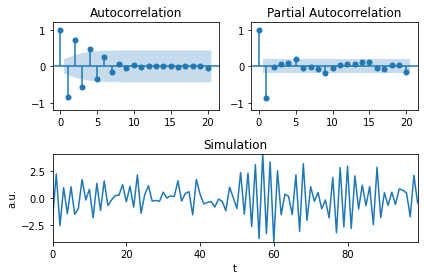

Stationary: True


In [29]:
# Parameters:
nSamples = 100
nLags = nSamples/2 - 1

arparams = np.array([-0.85])
maparams = np.array([])
ar = np.r_[1, -arparams]
ma = np.r_[1, maparams]

arima_process = ArmaProcess(ar= ar, ma= ma)
simulation = arima_process.generate_sample(nsample= nSamples)

# Plotting:
fig = plt.figure()
ax1 = plt.subplot(212)
ax1.margins(0)
ax1.plot(simulation)
ax1.set_title("Simulation")
ax1.set_xlabel("t")
ax1.set_ylabel("a.u.")

ax2 = plt.subplot(221)
ax2.margins(0.5)
plot_acf(simulation, ax= ax2)
ax2.set_ylim([-1.2, 1.2])

ax3 = plt.subplot(222)
ax3.margins(0.5)
plot_pacf(simulation, ax= ax3)
ax3.set_ylim([-1.2, 1.2])

fig.tight_layout()
plt.show()

print(f"Stationary: {arima_process.isstationary}")


### 2.) A(0, 0, 0)x(1, 0, 0)$_{12}$ model with $\Phi_1 = -0.85$

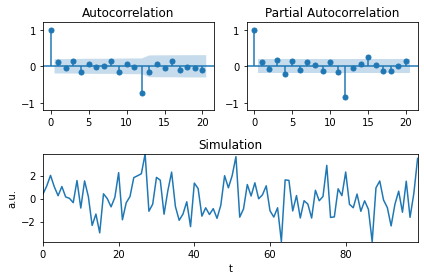

Stationary: True


In [30]:
# Parameters:
nSamples = 100
nLags = nSamples/2 - 1

arparams = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.85])
maparams = np.array([])
ar = np.r_[1, -arparams]
ma = np.r_[1, maparams]

arima_process = ArmaProcess(ar= ar, ma= ma)
simulation = arima_process.generate_sample(nsample= nSamples)

# Plotting:
fig = plt.figure()
ax1 = plt.subplot(212)
ax1.margins(0)
ax1.plot(simulation)
ax1.set_title("Simulation")
ax1.set_xlabel("t")
ax1.set_ylabel("a.u.")

ax2 = plt.subplot(221)
ax2.margins(0.5)
plot_acf(simulation, ax= ax2)
ax2.set_ylim([-1.2, 1.2])

ax3 = plt.subplot(222)
ax3.margins(0.5)
plot_pacf(simulation, ax= ax3)
ax3.set_ylim([-1.2, 1.2])

fig.tight_layout()
plt.show()

print(f"Stationary: {arima_process.isstationary}")


### 3.) A(1, 0, 0) x (0, 0, 1)$_{12}$ model with $\phi_1 = -0.8$ and $\Theta_1 = 0.9$.

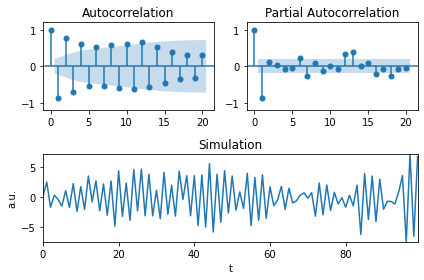

Stationary: True


In [31]:
# Parameters:
nSamples = 100
nLags = nSamples/2 - 1

arparams = np.array([-0.8])
maparams = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9])
ar = np.r_[1, -arparams]
ma = np.r_[1, maparams]

arima_process = ArmaProcess(ar= ar, ma= ma)
simulation = arima_process.generate_sample(nsample= nSamples)

# Plotting:
fig = plt.figure()
ax1 = plt.subplot(212)
ax1.margins(0)
ax1.plot(simulation)
ax1.set_title("Simulation")
ax1.set_xlabel("t")
ax1.set_ylabel("a.u.")

ax2 = plt.subplot(221)
ax2.margins(0.5)
plot_acf(simulation, ax= ax2)
ax2.set_ylim([-1.2, 1.2])

ax3 = plt.subplot(222)
ax3.margins(0.5)
plot_pacf(simulation, ax= ax3)
ax3.set_ylim([-1.2, 1.2])

fig.tight_layout()
plt.show()

print(f"Stationary: {arima_process.isstationary}")


### 4.) A(1, 0, 0)x(1, 0, 0)$_{12}$ with $\phi_1 = 0.7$ and $ \Phi_1 = 0.8$

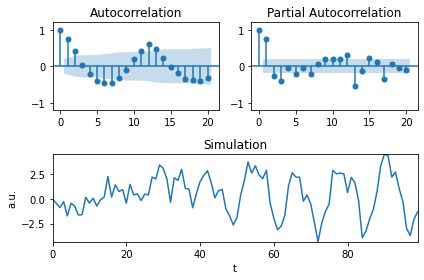

Stationary: True


In [32]:
# Parameters:
nSamples = 100
nLags = nSamples/2 - 1

arparams = np.array([0.7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.8, -0.56])
maparams = np.array([])
ar = np.r_[1, -arparams]
ma = np.r_[1, maparams]

arima_process = ArmaProcess(ar= ar, ma= ma)
simulation = arima_process.generate_sample(nsample= nSamples)

# Plotting:
fig = plt.figure()
ax1 = plt.subplot(212)
ax1.margins(0)
ax1.plot(simulation)
ax1.set_title("Simulation")
ax1.set_xlabel("t")
ax1.set_ylabel("a.u.")

ax2 = plt.subplot(221)
ax2.margins(0.5)
plot_acf(simulation, ax= ax2)
ax2.set_ylim([-1.2, 1.2])

ax3 = plt.subplot(222)
ax3.margins(0.5)
plot_pacf(simulation, ax= ax3)
ax3.set_ylim([-1.2, 1.2])

fig.tight_layout()
plt.show()

print(f"Stationary: {arima_process.isstationary}")

### 5.) A(2, 0, 0)x(1, 0, 0)$_{12}$ with $\phi_1 = 0.5$, $\phi_2 = -0.3$ and $ \Phi_1 = 0.8$

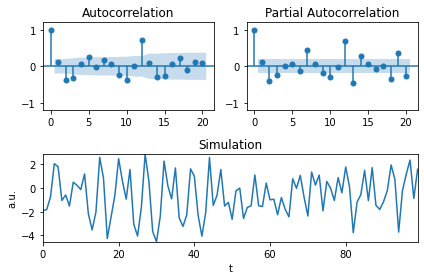

Stationary: True


In [33]:
# Parameters:
nSamples = 100
nLags = nSamples/2 - 1

arparams = np.array([0.5, -0.3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.8, -0.4, 0.24])
maparams = np.array([])
ar = np.r_[1, -arparams]
ma = np.r_[1, maparams]

arima_process = ArmaProcess(ar= ar, ma= ma)
simulation = arima_process.generate_sample(nsample= nSamples)

# Plotting:
fig = plt.figure()
ax1 = plt.subplot(212)
ax1.margins(0)
ax1.plot(simulation)
ax1.set_title("Simulation")
ax1.set_xlabel("t")
ax1.set_ylabel("a.u.")

ax2 = plt.subplot(221)
ax2.margins(0.5)
plot_acf(simulation, ax= ax2)
ax2.set_ylim([-1.2, 1.2])

ax3 = plt.subplot(222)
ax3.margins(0.5)
plot_pacf(simulation, ax= ax3)
ax3.set_ylim([-1.2, 1.2])

fig.tight_layout()
plt.show()

print(f"Stationary: {arima_process.isstationary}")

### 6.) A(0, 0, 1)x(0, 0, 1)$_{12}$ with $\theta_1 = -0.4$ and $\Theta_1 = 0.8$

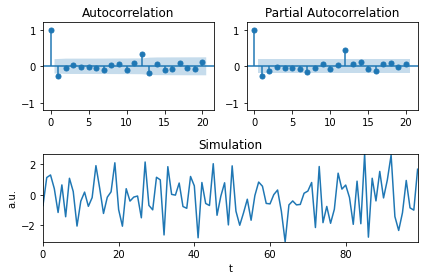

Stationary: True


In [34]:
# Parameters:
nSamples = 100
nLags = nSamples/2 - 1

arparams = np.array([])
maparams = np.array([-0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.8, -0.32])
ar = np.r_[1, -arparams]
ma = np.r_[1, maparams]

arima_process = ArmaProcess(ar= ar, ma= ma)
simulation = arima_process.generate_sample(nsample= nSamples)

# Plotting:
fig = plt.figure()
ax1 = plt.subplot(212)
ax1.margins(0)
ax1.plot(simulation)
ax1.set_title("Simulation")
ax1.set_xlabel("t")
ax1.set_ylabel("a.u.")

ax2 = plt.subplot(221)
ax2.margins(0.5)
plot_acf(simulation, ax= ax2)
ax2.set_ylim([-1.2, 1.2])

ax3 = plt.subplot(222)
ax3.margins(0.5)
plot_pacf(simulation, ax= ax3)
ax3.set_ylim([-1.2, 1.2])

fig.tight_layout()
plt.show()

print(f"Stationary: {arima_process.isstationary}")
